In [18]:
import pandas as pd

# 定义列名
column_names = ['IMSI', 'Timestamp', 'Longitude', 'Latitude']

# 读取CSV文件，header=None表示文件没有标题行，names参数指定列名
df = pd.read_csv('xinlin.csv', header=None, names=column_names)

# 查看数据框架的前几行以确认数据已正确读取
print(df.head())

   IMSI          Timestamp   Longitude   Latitude
0  4406  20240407 23:47:46  116.254753  39.887227
1   134  20240407 23:47:47  116.294670  39.857790
2  1316  20240407 23:47:51  116.281807  39.948059
3  4453  20240407 23:47:54  116.185365  39.921688
4  1842  20240407 23:47:55  116.336388  39.790555


In [4]:
"""
去除异常值
去除不合理的时间戳：筛选出不合理的时间戳，比如未来的日期或格式不正确的日期。

去除不合理的经纬度：根据经纬度的合理范围去除异常值。

"""
# 假设合理的经度范围是-180到180，纬度范围是-90到90
df = df[(df['Longitude'] >= -180) & (df['Longitude'] <= 180)]
df = df[(df['Latitude'] >= -90) & (df['Latitude'] <= 90)]

In [19]:
"""
数据转换
    1、时间戳转换：将时间戳从字符串转换为pandas的datetime类型，并分解为日期和时间。

"""
# 转换时间戳为datetime类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 如果需要，可以进一步分解日期和时间
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [20]:
print(df.head())

   IMSI           Timestamp   Longitude   Latitude        Date      Time
0  4406 2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46
1   134 2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47
2  1316 2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51
3  4453 2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54
4  1842 2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55


In [21]:
#保存清洗后的数据：将清洗和转换后的数据保存回CSV文件，以便进一步分析。
# 保存清洗后的数据到新的CSV文件
df.to_csv('cleaned_xinlin.csv', index=False)

In [174]:
#第二步：数据探索性分析（EDA）
#1. 导入数据和设置环境
import pandas as pd

# 读取清洗后的数据
df = pd.read_csv('cleaned_xinlin.csv')

In [36]:
#2. 初步查看数据
print(df.head())  # 查看前五行数据
print(df.tail())  # 查看后五行数据
print(df.info())  # 查看数据框架信息，包括列名和数据类型
print(df.describe())  # 查看数值型列的描述性统计

   IMSI            Timestamp   Longitude   Latitude        Date      Time
0  4406  2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46
1   134  2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47
2  1316  2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51
3  4453  2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54
4  1842  2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55
         IMSI            Timestamp   Longitude   Latitude        Date  \
2160426  9919  2024-04-08 23:54:39  116.314132  39.873244  2024-04-08   
2160427  1483  2024-04-08 23:54:43  116.732453  39.776412  2024-04-08   
2160428   471  2024-04-08 23:54:51  115.798112  39.534727  2024-04-08   
2160429  2287  2024-04-08 23:54:57  116.255331  40.234891  2024-04-08   
2160430  1569  2024-04-08 23:54:57  115.872448  40.490380  2024-04-08   

             Time  
2160426  23:54:39  
2160427  23:54:43  
2160428  23:54:51  
2160429  23:54:57  
2160430  23:54:57

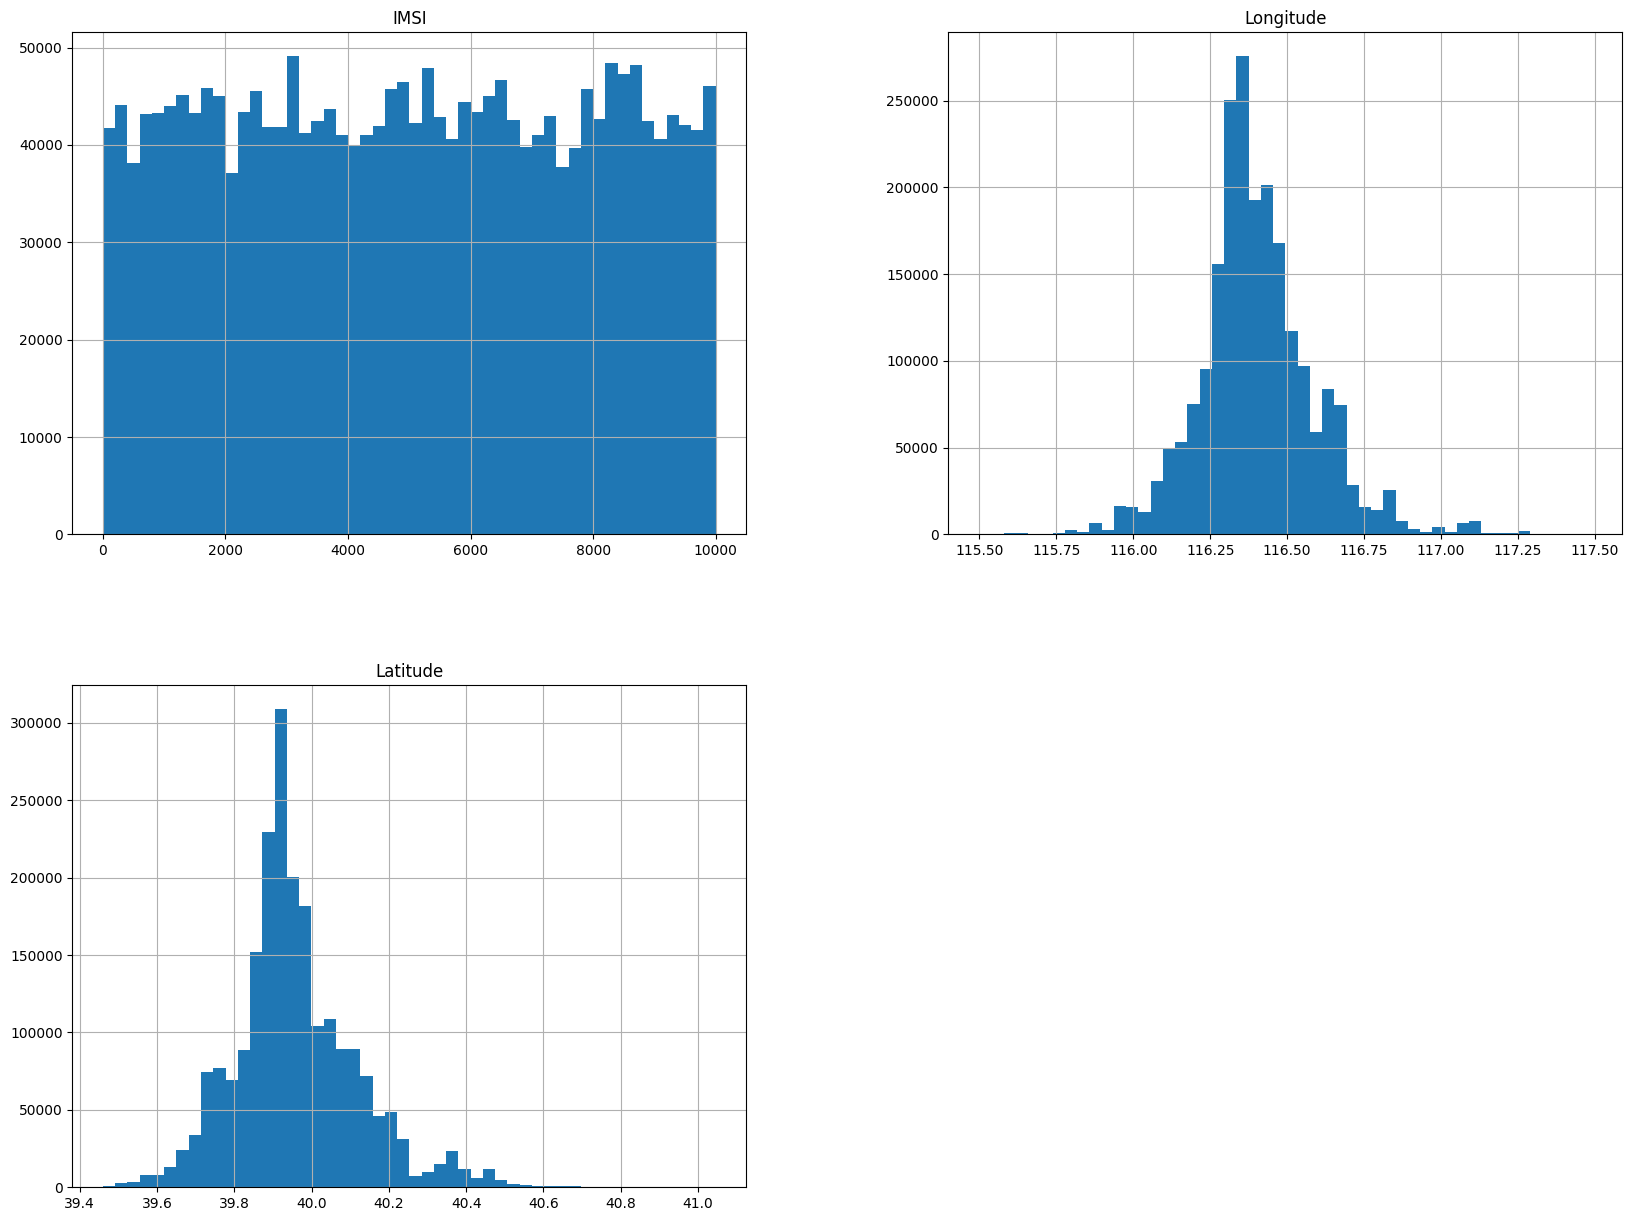

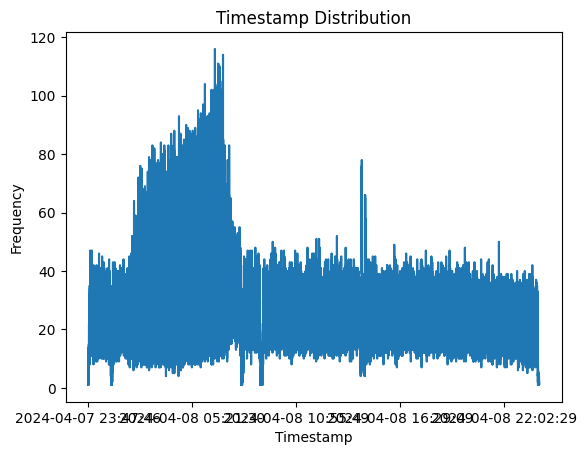

In [10]:
#3. 数据分布分析
# 对于数值型列，可以使用直方图
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# 对于时间戳列，可以查看其分布
df['Timestamp'].value_counts().sort_index().plot()
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

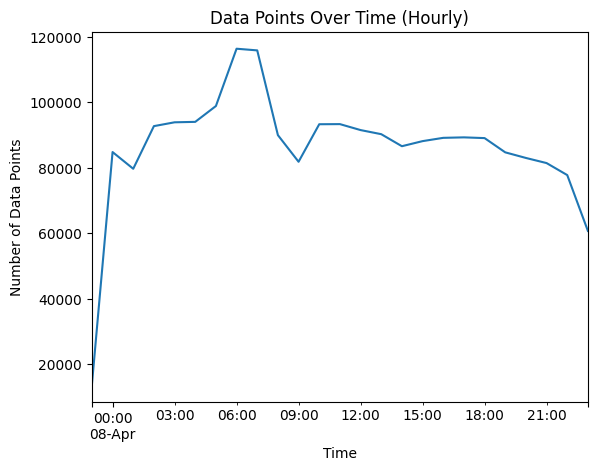

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df是你的DataFrame，并且已经加载了清洗后的数据

# 确保Timestamp列是datetime64类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 将Timestamp列设置为索引
df.set_index('Timestamp', inplace=True)

# 现在可以使用resample()进行时间序列分析
# 例如，按小时聚合并计算每个小时的数据点数量
hourly_data = df.resample('H').size()

# 绘制时间序列数据
hourly_data.plot()
plt.title('Data Points Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Data Points')
plt.show()

In [25]:
#5. 用户活跃度分析
# 用户活跃度
user_activity = df['IMSI'].value_counts().sort_values(ascending=False)
print(user_activity.head())  # 查看最活跃的用户

IMSI
1569    3297
2459    3007
2351    2535
2515    2441
5917    2291
Name: count, dtype: int64


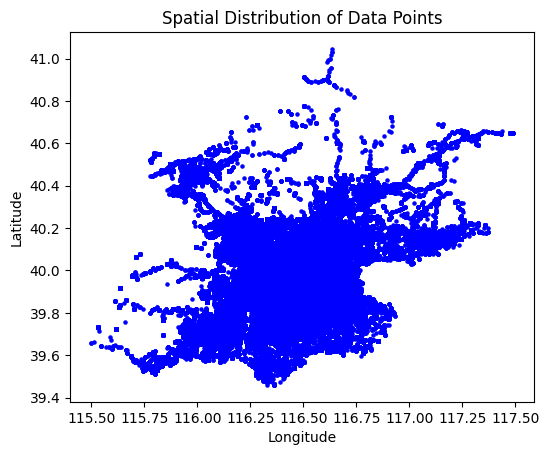

In [29]:
#6. 空间分布分析
# 假设你已经安装了geopandas和matplotlib
import geopandas as gpd
from shapely.geometry import Point

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)

# 绘制空间分布图
gdf.plot(marker='o', color='b', markersize=5)
plt.title('Spatial Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

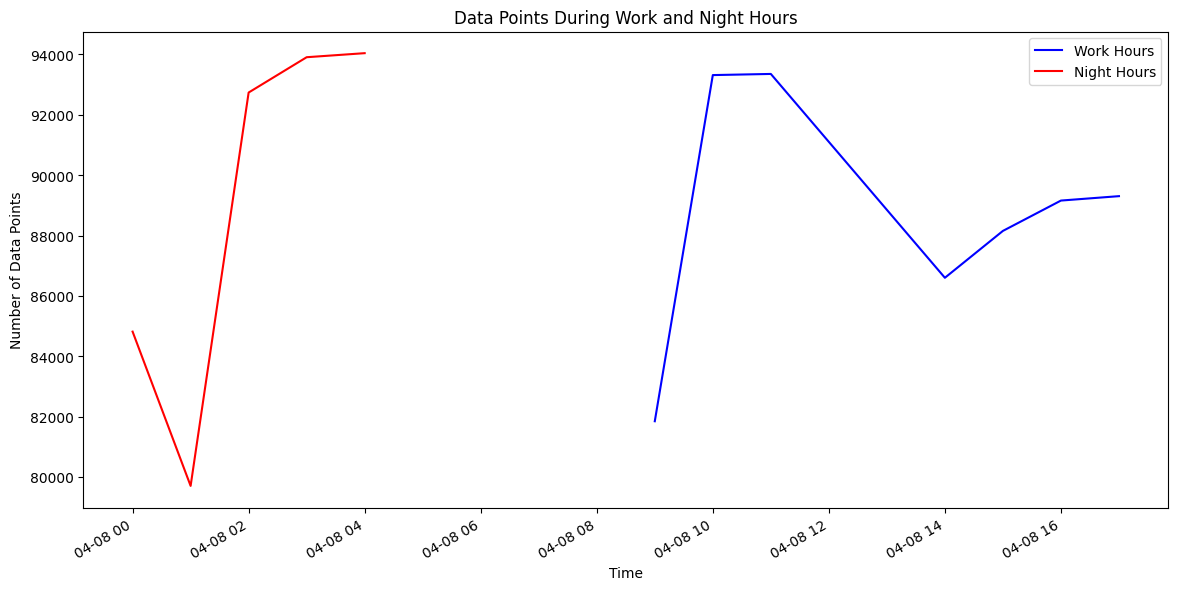

In [41]:
"""
选择工作时段9：00- 11：30与14：00-17：00，选择夜间休息时段 0：00-5：00。

分析工作时段和夜间休息时段的数据
"""
# 分析工作时段的数据（9:00-11:30和14:00-17:00）
work_hours_data = df.resample('H').size()
work_hours_data = work_hours_data[(work_hours_data.index.time >= pd.Timestamp('09:00:00').time()) &
                                  (work_hours_data.index.time <= pd.Timestamp('11:30:00').time()) |
                                  (work_hours_data.index.time >= pd.Timestamp('14:00:00').time()) &
                                  (work_hours_data.index.time <= pd.Timestamp('17:00:00').time())]

# 分析夜间休息时段的数据（0:00-5:00）
night_hours_data = df.resample('H').size()
night_hours_data = night_hours_data[(night_hours_data.index.time >= pd.Timestamp('00:00:00').time()) &
                                     (night_hours_data.index.time < pd.Timestamp('05:00:00').time())]

# 可视化工作时段和夜间休息时段的数据
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
work_hours_data.plot(color='blue', label='Work Hours')
night_hours_data.plot(color='red', label='Night Hours')
plt.title('Data Points During Work and Night Hours')
plt.xlabel('Time')
plt.ylabel('Number of Data Points')
plt.legend()
plt.show()

In [42]:
"""
第三步：数据聚合
1、时间聚合：按小时、按天、按周等不同时间尺度对数据进行聚合。
2、空间聚合：根据基站位置，将数据聚合到不同的区域或行政区划。
"""
#1. 时间聚合。只能用小时，上一步已做
#2. 空间聚合
# 假设df包含'Longitude'和'Latitude'列
# 可以使用地理空间库（如geopandas）进行空间聚合
# 以下是一个简单的示例，使用pandas进行基于网格的空间聚合
import numpy as np

# 定义网格大小，例如每0.1度一个网格
grid_size = 0.1
df['Grid'] = (df['Longitude'] // grid_size).astype(int) * -1000 + df['Latitude'] // grid_size

# 按网格聚合
grid_data = df.groupby('Grid').size()

In [43]:
#3. 用户聚合
# 假设'IMSI'是用户标识符列
# 按用户聚合
user_data = df.groupby('IMSI').size()

In [45]:
#6. 聚合后的分析
# 计算每个小时的平均用户数量
hourly_mean_users = df.groupby(pd.Grouper(freq='H'))['IMSI'].count().mean()

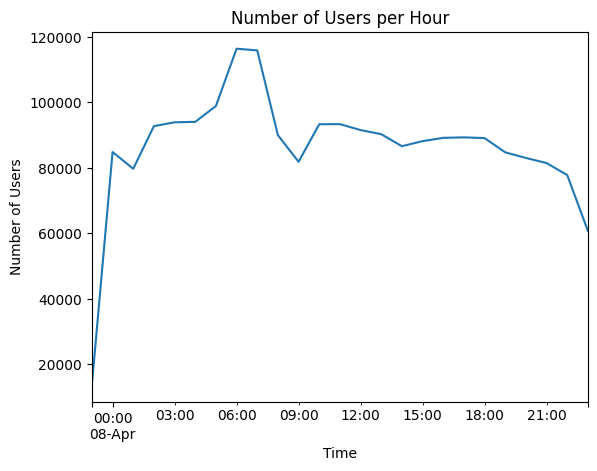

In [46]:
#7. 可视化聚合结果
# 可视化每小时的用户数量
hourly_data.plot()
plt.title('Number of Users per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Users')
plt.show()

In [173]:
# 计算每个小时的平均用户数量
hourly_mean_users = df.groupby(pd.Grouper(freq='H'))['IMSI'].count().mean()
#7. 可视化聚合结果
# 可视化每小时的用户数量
hourly_data.plot()
plt.title('Number of Users per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Users')
plt.show()

KeyError: 'Column not found: IMSI'

In [50]:
#第四步：通勤模式分析
import pandas as pd

# 确保'Timestamp'列是datetime64类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 将'Timestamp'列设置为索引
df.set_index('Timestamp', inplace=True)

# 检查DataFrame的索引是否为DatetimeIndex类型
print(df.index)

DatetimeIndex(['2024-04-07 23:47:46', '2024-04-07 23:47:47',
               '2024-04-07 23:47:51', '2024-04-07 23:47:54',
               '2024-04-07 23:47:55', '2024-04-07 23:47:55',
               '2024-04-07 23:47:56', '2024-04-07 23:47:56',
               '2024-04-07 23:47:56', '2024-04-07 23:47:57',
               ...
               '2024-04-08 23:54:31', '2024-04-08 23:54:34',
               '2024-04-08 23:54:34', '2024-04-08 23:54:35',
               '2024-04-08 23:54:38', '2024-04-08 23:54:39',
               '2024-04-08 23:54:43', '2024-04-08 23:54:51',
               '2024-04-08 23:54:57', '2024-04-08 23:54:57'],
              dtype='datetime64[ns]', name='Timestamp', length=2160431, freq=None)


In [53]:
#1、定义工作时段和夜间休息时段
# 假设'Timestamp'列已经是DatetimeIndex类型
work_hours_mask = ((df.index.hour >= 9) & (df.index.hour <= 11)) | \
                   ((df.index.hour >= 14) & (df.index.hour <= 17))
night_hours_mask = (df.index.hour >= 0) & (df.index.hour < 5)


In [54]:
#2、筛选特定时间段内的最后位置
# 对于工作时段
work_hours_data = df[work_hours_mask]

# 对于夜间休息时段
night_hours_data = df[night_hours_mask]

# 按用户分组并按时间降序排序，取每组的最后一行
last_work_location = work_hours_data.groupby('IMSI').apply(lambda x: x.iloc[-1]).reset_index(level=0, drop=True)
last_night_location = night_hours_data.groupby('IMSI').apply(lambda x: x.iloc[-1]).reset_index(level=0, drop=True)

In [55]:
#3、标记“工作地点”和“家”
# 假设用户在工作时段的最后位置是工作地点
workplaces = last_work_location.copy()
workplaces['Type'] = 'Workplace'

# 假设用户在夜间休息时段的最后位置是家
homes = last_night_location.copy()
homes['Type'] = 'Home'

In [56]:
#4、分析通勤流量
# 假设早晨通勤时间段为6:00-9:00，晚上通勤时间段为17:00-19:00
morning_commute_mask = ((df.index.hour >= 6) & (df.index.hour < 9))
evening_commute_mask = ((df.index.hour >= 17) & (df.index.hour < 19))

morning_commute_data = df[morning_commute_mask]
evening_commute_data = df[evening_commute_mask]

In [63]:
#5：识别通勤路径
    #1）确定用户在“家”和“工作地点”的位置
    #2）追踪用户的移动
# 早晨通勤时间段（例如，从家出发前一个小时到开始工作后一个小时）
morning_commute_start = pd.Timestamp('07:00:00')
morning_commute_end = pd.Timestamp('10:00:00')

# 晚上通勤时间段（例如，从工作结束前一个小时到回家后一个小时）
evening_commute_start = pd.Timestamp('16:00:00')
evening_commute_end = pd.Timestamp('19:00:00')

morning_commute_data = df[(df['Timestamp'] >= morning_commute_start) & (df['Timestamp'] <= morning_commute_end)]
evening_commute_data = df[(df['Timestamp'] >= evening_commute_start) & (df['Timestamp'] <= evening_commute_end)]
    #3）

In [61]:
type(df['Timestamp'] )

pandas.core.series.Series

In [62]:
# 定义时间范围
morning_commute_start_str = '07:00:00'
morning_commute_end_str = '10:00:00'
evening_commute_start_str = '16:00:00'
evening_commute_end_str = '19:00:00'

# 将字符串转换为Timestamp对象
morning_commute_start = pd.Timestamp(morning_commute_start_str)
morning_commute_end = pd.Timestamp(morning_commute_end_str)
evening_commute_start = pd.Timestamp(evening_commute_start_str)
evening_commute_end = pd.Timestamp(evening_commute_end_str)

# 确保'Timestamp'列是datetime64类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 现在使用这些Timestamp对象来过滤数据
morning_commute_data = df[(df['Timestamp'] >= morning_commute_start) & 
                           (df['Timestamp'] <= morning_commute_end)]
evening_commute_data = df[(df['Timestamp'] >= evening_commute_start) & 
                           (df['Timestamp'] <= evening_commute_end)]

In [68]:
#3）计算移动距离
from geopy.distance import great_circle

# 辅助函数，计算单个数据点与家之间的距离
def calculate_distance(row, homes):
    # 假设 homes 是一个字典，以 IMSI 为键，经纬度元组为值
    # homes = {'IMSI': (longitude, latitude)}
    home_location = homes.get(row['IMSI'], (None, None))
    if home_location[0] is not None and home_location[1] is not None:
        return great_circle((home_location[0], home_location[1]), 
                            (row['Longitude'], row['Latitude'])).kilometers
    else:
        return np.nan  # 如果没有找到家的位置，返回NaN

In [69]:
# 假设 homes_df 是包含每个用户家位置的 DataFrame
# homes_df = pd.DataFrame({'IMSI': [...], 'Home_Longitude': [...], 'Home_Latitude': [...]})

# 将 homes_df 转换为字典，以 IMSI 为键
homes = dict(zip(homes_df['IMSI'], zip(homes_df['Home_Longitude'], homes_df['Home_Latitude'])))

# 计算距离并创建新列
morning_commute_data['Distance_from_Home'] = morning_commute_data.apply(
    lambda row: calculate_distance(row, homes), axis=1
)

NameError: name 'homes_df' is not defined

In [80]:
#步骤1：定义工作时段和夜间休息时段的掩码
# 定义工作时段掩码
work_hours_mask = ((df['Timestamp'].dt.hour >= 9) & (df['Timestamp'].dt.hour <= 11)) | \
                  ((df['Timestamp'].dt.hour >= 14) & (df['Timestamp'].dt.hour <= 17))

# 定义夜间休息时段掩码
night_hours_mask = ((df['Timestamp'].dt.hour >= 0) & (df['Timestamp'].dt.hour < 5))

In [81]:
#步骤2：为工作时段和夜间休息时段的数据创建索引

# 对于工作时段，按用户和基站分组
work_hours_data = df[work_hours_mask].groupby(['IMSI', 'Longitude', 'Latitude']).size().reset_index(name='Work_Count')

# 对于夜间休息时段，按用户和基站分组
night_hours_data = df[night_hours_mask].groupby(['IMSI', 'Longitude', 'Latitude']).size().reset_index(name='Night_Count')

In [82]:
#步骤3：识别“工作地点”和“家”
# 识别工作地点：工作时段停留次数大于等于2次
workplaces = work_hours_data[work_hours_data['Work_Count'] >= 2]

# 识别家：夜间休息时段停留次数大于等于4次
homes = night_hours_data[night_hours_data['Night_Count'] >= 4]

In [83]:
#步骤4、为df添加“工作地点”和“家”的经纬度列
# 添加新列以存储推断出的“工作地点”和“家”的位置
df['Workplace_Longitude'] = None
df['Workplace_Latitude'] = None
df['Home_Longitude'] = None
df['Home_Latitude'] = None

# 填充“工作地点”的经纬度
for index, row in workplaces.iterrows():
    df.loc[df['IMSI'] == row['IMSI'], ['Workplace_Longitude', 'Workplace_Latitude']] = row[['Longitude', 'Latitude']]

# 填充“家”的经纬度
for index, row in homes.iterrows():
    df.loc[df['IMSI'] == row['IMSI'], ['Home_Longitude', 'Home_Latitude']] = row[['Longitude', 'Latitude']]

In [86]:
# 早晨和晚上通勤时间段的定义
morning_commute_hours = (df['Timestamp'].dt.hour >= 6) & (df['Timestamp'].dt.hour <= 9)
evening_commute_hours = (df['Timestamp'].dt.hour >= 17) & (df['Timestamp'].dt.hour <= 19)

# 筛选早晨和晚上的通勤数据
morning_commute_data = df[morning_commute_hours]
evening_commute_data = df[evening_commute_hours]

# 分析从“家”到“工作地点”的移动
# 这里需要进一步的逻辑来分析移动，例如检查用户是否从家的位置移动到了工作地点的位置

In [87]:
from geopy.distance import geodesic
import pandas as pd
#创建辅助函数来计算两个经纬度之间的距离
def calculate_distance(point1, point2):
    # point1 和 point2 是包含经纬度的元组 (longitude, latitude)
    return geodesic(point1, point2).km  # 返回公里数


In [89]:
#为“家”和“工作地点”创建经纬度列表
# 示例数据，实际中这里应该是你的数据
# 假设 df 是包含用户所有位置数据的 DataFrame，其中包含 'IMSI', 'Longitude', 'Latitude' 和 'Timestamp' 列

# 根据之前定义的工作时段和夜间休息时段的规则，筛选出每个用户的工作地点和家的位置
# 这里我们简单地取每个用户在工作时段和夜间时段最后记录的位置作为工作地点和家
# 注意：你可能需要根据实际情况调整逻辑

# 将时间戳转换为 Pandas 的 datetime 类型（如果尚未转换）
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 定义工作时段和夜间休息时段的掩码
work_hours_mask = ((df['Timestamp'].dt.hour >= 9) & (df['Timestamp'].dt.hour <= 11)) | \
                  ((df['Timestamp'].dt.hour >= 14) & (df['Timestamp'].dt.hour <= 17))
night_hours_mask = ((df['Timestamp'].dt.hour >= 0) & (df['Timestamp'].dt.hour < 5))

# 对于工作时段和夜间休息时段，按用户分组，并取每个用户最后一条记录作为工作地点和家
workplaces = df[work_hours_mask].groupby('IMSI').tail(1)
homes = df[night_hours_mask].groupby('IMSI').tail(1)

# 从分组中提取工作地点和家的经纬度
workplaces = workplaces[['Longitude', 'Latitude']].rename(columns={'Longitude': 'Workplace_Longitude', 'Latitude': 'Workplace_Latitude'})
homes = homes[['Longitude', 'Latitude']].rename(columns={'Longitude': 'Home_Longitude', 'Latitude': 'Home_Latitude'})

In [93]:
# 假设 'IMSI' 是用户标识符列
# 工作时段按用户分组，并保留 'IMSI' 列
workplaces = df[work_hours_mask].groupby('IMSI').agg({'Longitude': 'max', 'Latitude': 'max'}).reset_index()

# 夜间休息时段按用户分组，并保留 'IMSI' 列
homes = df[night_hours_mask].groupby('IMSI').agg({'Longitude': 'max', 'Latitude': 'max'}).reset_index()

In [117]:
#合并“家”和“工作地点”的数据
# 合并两个 DataFrame，以便为每个用户提供家和工作地点的经纬度
# 合并 DataFrame，保留 'IMSI' 作为合并键
combined = pd.merge(homes, workplaces, on='IMSI', suffixes=('_home', '_work'))


In [119]:
# 确保经纬度列是浮点数类型
combined['Latitude_home'] = combined['Latitude_home'].astype(float)
combined['Longitude_home'] = combined['Longitude_home'].astype(float)
combined['Latitude_work'] = combined['Latitude_work'].astype(float)
combined['Longitude_work'] = combined['Longitude_work'].astype(float)

In [122]:
# 检查转换后的数据中是否存在无效值
print(combined[(combined['Latitude_home'] < -90) | (combined['Latitude_home'] > 90) | 
                (combined['Longitude_home'] < -180) | (combined['Longitude_home'] > 180) |
                (combined['Latitude_work'] < -90) | (combined['Latitude_work'] > 90) | 
                (combined['Longitude_work'] < -180) | (combined['Longitude_work'] > 180)])

Empty DataFrame
Columns: [IMSI, Longitude_home, Latitude_home, Longitude_work, Latitude_work]
Index: []


In [127]:
print(combined.info())  # 查看数据框架信息，包括列名和数据类型
print(combined.describe())  # 查看数值型列的描述性统计

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMSI            8967 non-null   int64  
 1   Longitude_home  8967 non-null   float64
 2   Latitude_home   8967 non-null   float64
 3   Longitude_work  8967 non-null   float64
 4   Latitude_work   8967 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 350.4 KB
None
               IMSI  Longitude_home  Latitude_home  Longitude_work  \
count   8967.000000     8967.000000    8967.000000     8967.000000   
mean    4997.561838      116.404810      39.956362      116.431431   
std     2890.582103        0.194035       0.162209        0.188955   
min        1.000000      115.628949      39.482131      115.530092   
25%     2494.000000      116.295051      39.861114      116.321720   
50%     5013.000000      116.386371      39.930600      116.412541   
75%     7496.500000      116.505

In [128]:
# 重新计算距离，确保使用正确的列名
from geopy.point import Point
from geopy.distance import geodesic

# 使用Point对象来创建点
combined['Distance_to_Work'] = combined.apply(
    lambda row: geodesic(
        Point(row['Latitude_home'], row['Longitude_home']),
        Point(row['Latitude_work'], row['Longitude_work'])
    ).kilometers if row['IMSI'] is not None else None,
    axis=1
)

In [129]:
# 将距离信息添加回原始 DataFrame
df = df.merge(combined[['IMSI', 'Distance_to_Work']], on='IMSI', how='left')

In [134]:
print(combined.columns)

Index(['IMSI', 'Longitude_home', 'Latitude_home', 'Longitude_work',
       'Latitude_work', 'Distance_to_Work'],
      dtype='object')


In [99]:
print(homes[['Longitude', 'Latitude']])
print(workplaces[['Longitude', 'Latitude']])

       Longitude   Latitude
0     116.630642  40.341083
1     116.318848  40.070577
2     116.303258  39.989530
3     116.245351  40.043624
4     116.400278  39.991944
...          ...        ...
9063  116.258520  39.851370
9064  116.651605  40.308341
9065  116.408161  40.006611
9066  116.409778  40.084742
9067  116.322500  39.948470

[9068 rows x 2 columns]
       Longitude   Latitude
0     116.644237  40.340011
1     116.277873  40.043248
2     116.305306  39.990395
3     116.415036  40.050080
4     116.428281  39.995699
...          ...        ...
9876  116.344970  40.012820
9877  116.661965  40.314134
9878  116.408161  40.006611
9879  116.409778  40.084742
9880  116.315860  39.989700

[9881 rows x 2 columns]


In [91]:
print(df.head())

   IMSI           Timestamp   Longitude   Latitude        Date      Time  \
0  4406 2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46   
1   134 2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47   
2  1316 2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51   
3  4453 2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54   
4  1842 2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55   

  Workplace_Longitude Workplace_Latitude Home_Longitude Home_Latitude  
0                 NaN                NaN            NaN           NaN  
1                 NaN                NaN            NaN           NaN  
2                 NaN                NaN            NaN           NaN  
3                 NaN                NaN            NaN           NaN  
4                None               None            NaN           NaN  


In [115]:
print(homes.columns)
print(workplaces.columns)

Index(['IMSI', 'Longitude', 'Latitude'], dtype='object')
Index(['IMSI', 'Longitude', 'Latitude'], dtype='object')


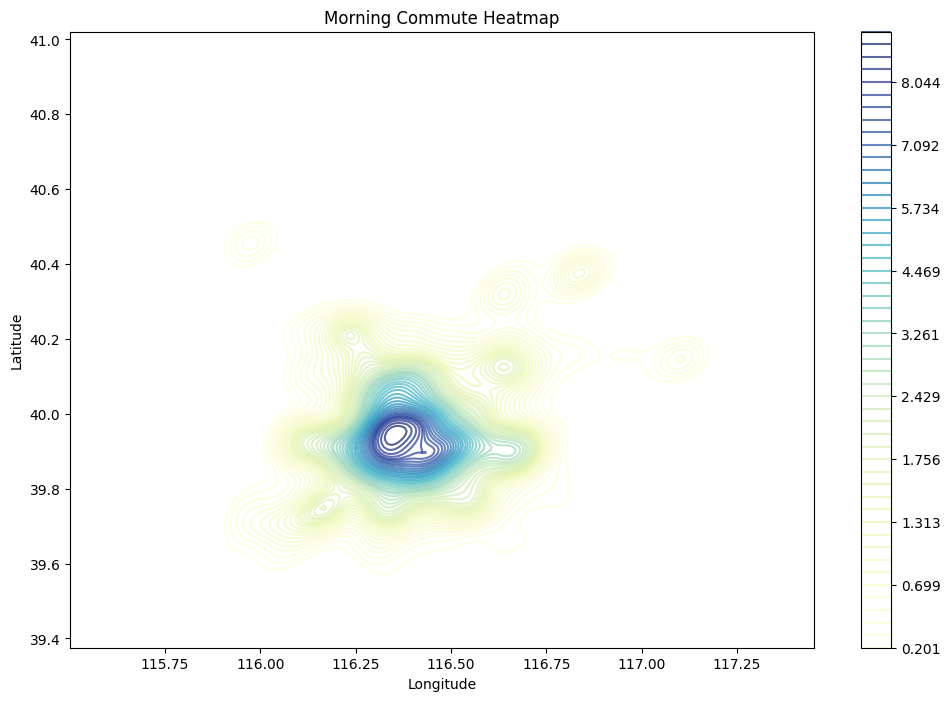

In [136]:
#1. 热力图---热力图可以展示在特定时间段内用户活动最频繁的区域

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.kdeplot(x=combined['Longitude_home'],
            y=combined['Latitude_home'],
            cbar=True,
            cmap="YlGnBu",
            n_levels=50,
            alpha=0.7)
plt.title('Morning Commute Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [159]:
! pip install scikit-learn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 13.2 MB/s eta 0:00:0000:0100:01
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


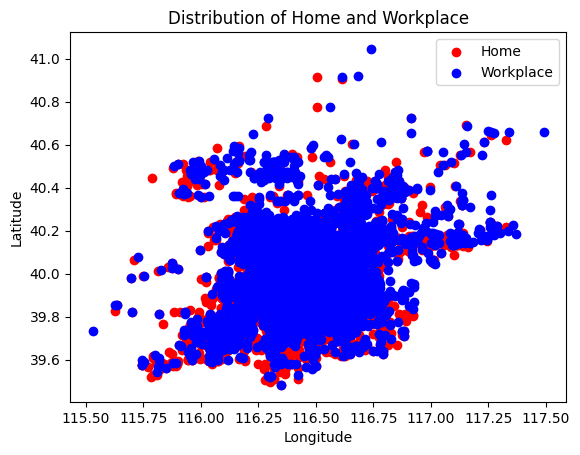

In [141]:
#1. 起点和终点分布图
import matplotlib.pyplot as plt

# 绘制家的分布（起点）
plt.scatter(combined['Longitude_home'], combined['Latitude_home'], color='red', label='Home')

# 绘制工作地点的分布（终点）
plt.scatter(combined['Longitude_work'], combined['Latitude_work'], color='blue', label='Workplace')

plt.title('Distribution of Home and Workplace')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

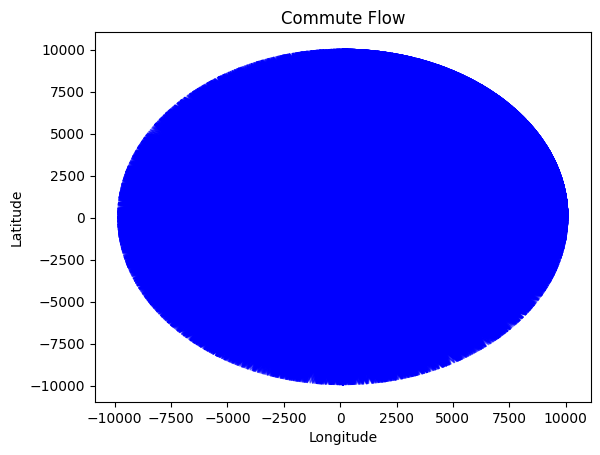

In [142]:
#2. 通勤流向图
# 为了绘制流向图，我们可能需要一个包含起点和终点坐标的DataFrame
# 例如：
commute_flow = combined[['IMSI', 'Longitude_home', 'Latitude_home', 'Longitude_work', 'Latitude_work']]

# 使用geopandas创建流向图
import geopandas as gpd
from shapely.geometry import Point

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(commute_flow, geometry=gpd.points_from_xy(commute_flow['Longitude_home'], commute_flow['Latitude_home']))

# 添加终点坐标作为另一个属性
gdf['End_Location'] = gpd.points_from_xy(commute_flow['Longitude_work'], commute_flow['Latitude_work'])

# 使用matplotlib绘制流向
import matplotlib.pyplot as plt

for index, row in gdf.iterrows():
    plt.arrow(row['Longitude_home'], row['Latitude_home'],
              row['Longitude_work'] - row['Longitude_home'],
              row['Latitude_work'] - row['Latitude_home'],
              color='blue', head_width=5000, head_length=10000, alpha=0.5)

plt.title('Commute Flow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

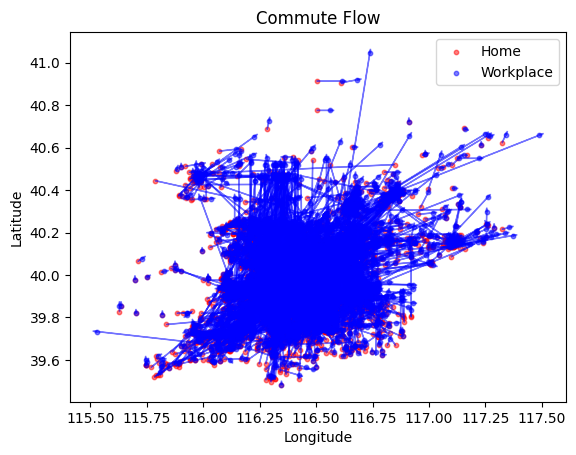

In [147]:
#上图优化
import matplotlib.pyplot as plt
import numpy as np

# 假设combined是一个DataFrame，包含了从家到工作地点的移动数据

# 绘制背景地图（可选）
plt.scatter(combined['Longitude_home'], combined['Latitude_home'], s=10, c='red', alpha=0.5, label='Home')
plt.scatter(combined['Longitude_work'], combined['Latitude_work'], s=10, c='blue', alpha=0.5, label='Workplace')

# 绘制流向箭头
for index, row in combined.iterrows():
    plt.arrow(row['Longitude_home'], row['Latitude_home'],
               row['Longitude_work'] - row['Longitude_home'],
               row['Latitude_work'] - row['Latitude_home'],
               color='blue', head_width=0.01, head_length=0.02, alpha=0.5)

plt.title('Commute Flow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [160]:
#使用聚合方法，减少线条
from sklearn.cluster import KMeans
import numpy as np

# 假设我们想要的聚类数量
num_clusters_home = 5  # 家的聚类数量
num_clusters_work = 5  # 工作地点的聚类数量

# 转换数据为numpy数组
homes_array = combined[['Longitude_home', 'Latitude_home']].values
workplaces_array = combined[['Longitude_work', 'Latitude_work']].values

# 应用K-means聚类
kmeans_homes = KMeans(n_clusters=num_clusters_home, random_state=0).fit(homes_array)
kmeans_workplaces = KMeans(n_clusters=num_clusters_work, random_state=0).fit(workplaces_array)

# 获取聚类中心作为聚合后的起始点和终止点
centroids_homes = kmeans_homes.cluster_centers_
centroids_workplaces = kmeans_workplaces.cluster_centers_

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



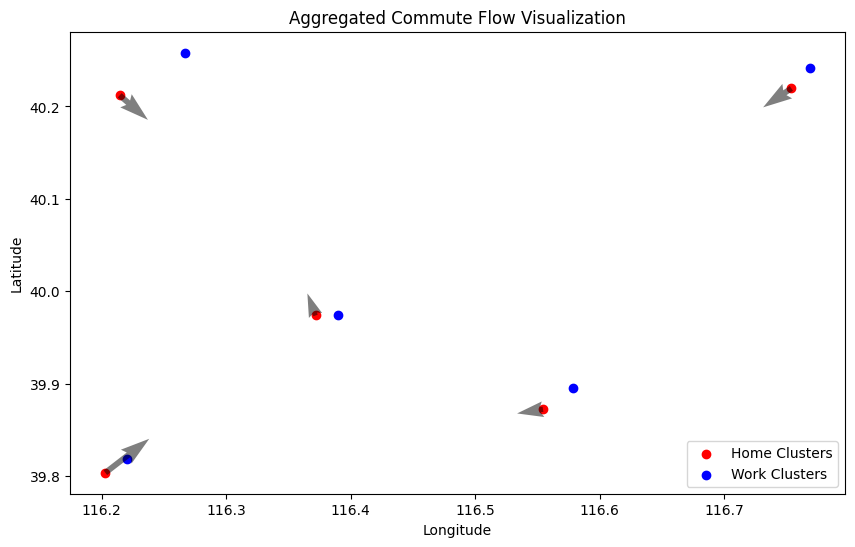

In [161]:
import matplotlib.pyplot as plt

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制家的聚合中心
ax.scatter(centroids_homes[:, 0], centroids_homes[:, 1], c='red', label='Home Clusters')

# 绘制工作地点的聚合中心
ax.scatter(centroids_workplaces[:, 0], centroids_workplaces[:, 1], c='blue', label='Work Clusters')

# 绘制流向
for i in range(num_clusters_home):
    if i < num_clusters_work:  # 确保工作地点的聚类数量不小于家的聚类数量
        ax.quiver(centroids_homes[i, 0], centroids_homes[i, 1],
                  centroids_workplaces[i, 0] - centroids_homes[i, 0],
                  centroids_workplaces[i, 1] - centroids_homes[i, 1],
                  color='black', scale=10, alpha=0.5)

# 设置图形的标题和坐标轴标签
plt.title('Aggregated Commute Flow Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图例
plt.legend()

# 显示图形
plt.show()

In [162]:
#重新聚类，增加线条
# 例如，增加聚类数量
num_clusters_home = 20
num_clusters_work = 20

# 重新进行聚类
kmeans_homes = KMeans(n_clusters=num_clusters_home, random_state=0).fit(homes_array)
kmeans_workplaces = KMeans(n_clusters=num_clusters_work, random_state=0).fit(workplaces_array)

# 重新绘制流向图
# ...

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



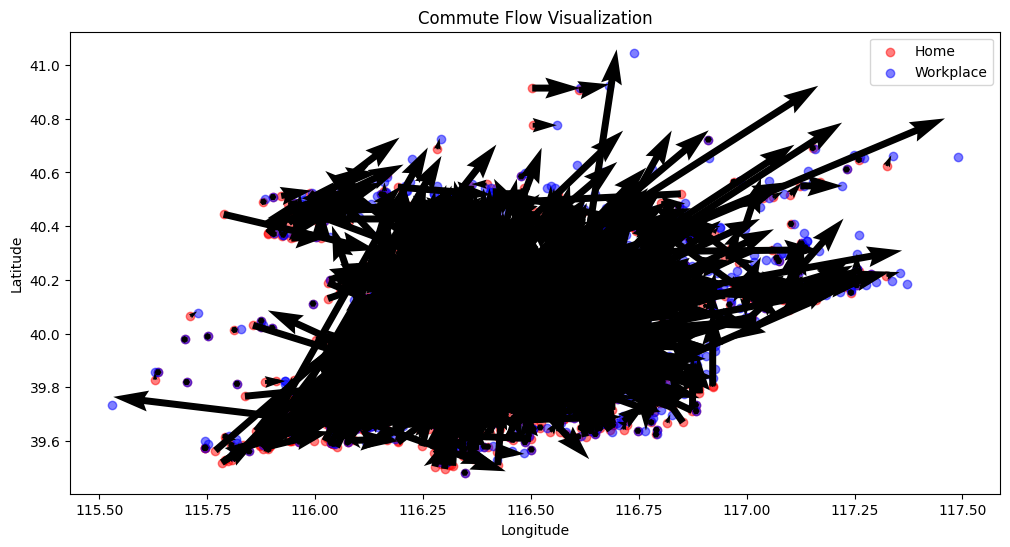

In [165]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设combined DataFrame已经存在，并且包含起点和终点的经纬度
# combined = pd.DataFrame(data, columns=['IMSI', 'Longitude_home', 'Latitude_home', 'Longitude_work', 'Latitude_work'])

# 提取起点和终点的经纬度
start_lon = combined['Longitude_home']
start_lat = combined['Latitude_home']
end_lon = combined['Longitude_work']
end_lat = combined['Latitude_work']

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制起点
scatter = ax.scatter(start_lon, start_lat, c='red', label='Home', alpha=0.5)

# 绘制终点
ax.scatter(end_lon, end_lat, c='blue', label='Workplace', alpha=0.5)

# 绘制流向
for i in range(len(combined)):
    ax.quiver(start_lon[i], start_lat[i], end_lon[i] - start_lon[i], end_lat[i] - start_lat[i],
               color='black', scale_units='xy', scale=1)

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('Commute Flow Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图形
plt.show()

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



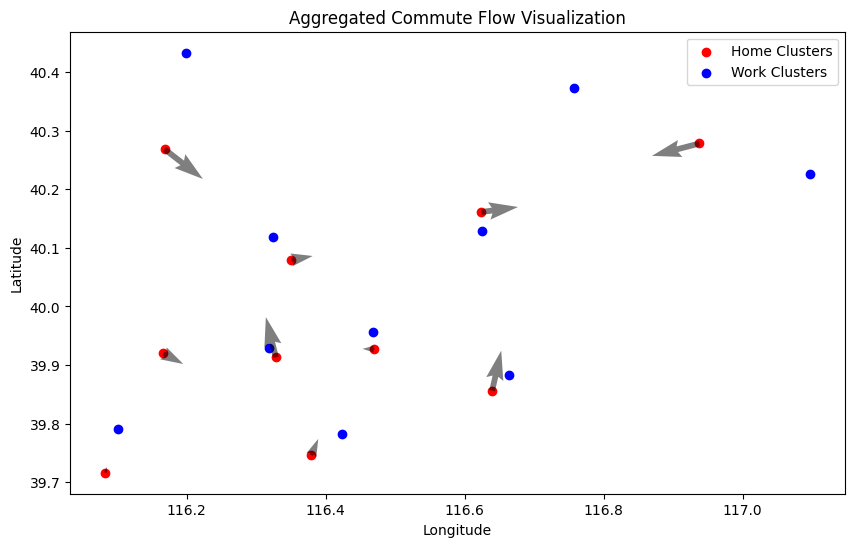

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_57929/1236114561.py:53: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_57929/1236114561.py:54: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: title={'center': 'Aggregated Commute Flow Visualization'}, xlabel='Longitude', ylabel='Latitude'>

In [167]:
#使用聚合方法，减少线条
from sklearn.cluster import KMeans
import numpy as np

# 假设我们想要的聚类数量
num_clusters_home = 10  # 家的聚类数量
num_clusters_work = 10  # 工作地点的聚类数量

# 转换数据为numpy数组
homes_array = combined[['Longitude_home', 'Latitude_home']].values
workplaces_array = combined[['Longitude_work', 'Latitude_work']].values

# 应用K-means聚类
kmeans_homes = KMeans(n_clusters=num_clusters_home, random_state=0).fit(homes_array)
kmeans_workplaces = KMeans(n_clusters=num_clusters_work, random_state=0).fit(workplaces_array)

# 获取聚类中心作为聚合后的起始点和终止点
centroids_homes = kmeans_homes.cluster_centers_
centroids_workplaces = kmeans_workplaces.cluster_centers_

import matplotlib.pyplot as plt

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制家的聚合中心
ax.scatter(centroids_homes[:, 0], centroids_homes[:, 1], c='red', label='Home Clusters')

# 绘制工作地点的聚合中心
ax.scatter(centroids_workplaces[:, 0], centroids_workplaces[:, 1], c='blue', label='Work Clusters')

# 绘制流向
for i in range(num_clusters_home):
    if i < num_clusters_work:  # 确保工作地点的聚类数量不小于家的聚类数量
        ax.quiver(centroids_homes[i, 0], centroids_homes[i, 1],
                  centroids_workplaces[i, 0] - centroids_homes[i, 0],
                  centroids_workplaces[i, 1] - centroids_homes[i, 1],
                  color='black', scale=10, alpha=0.5)

# 设置图形的标题和坐标轴标签
plt.title('Aggregated Commute Flow Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图例
plt.legend()

# 显示图形
plt.show()


# 绘制热力图叠加-----图中未显示
sns.kdeplot(x=combined['Longitude_home'], y=combined['Latitude_home'], cmap='Reds', shade=True, ax=ax)
sns.kdeplot(x=combined['Longitude_work'], y=combined['Latitude_work'], cmap='Blues', shade=True, ax=ax)

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_57929/247079168.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




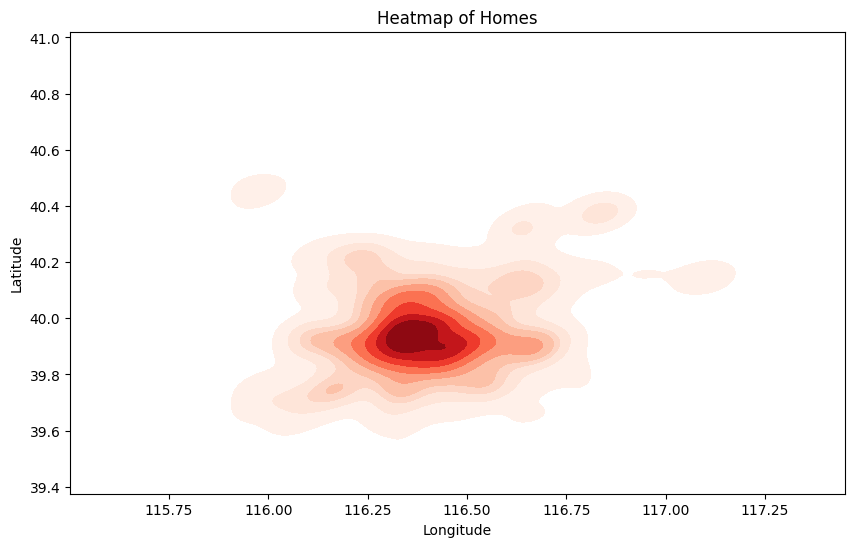

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_57929/247079168.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




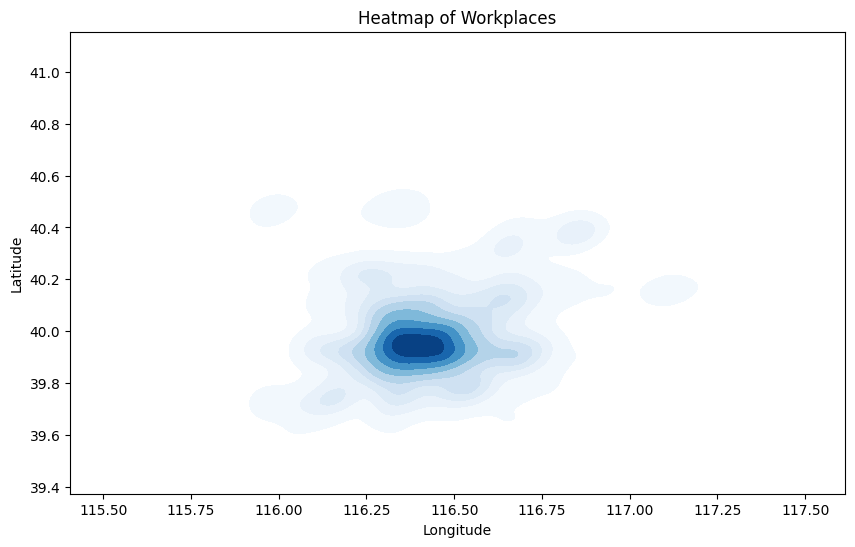

In [143]:
#3. 热力图
import seaborn as sns

# 绘制家的热力图
plt.figure(figsize=(10, 6))
sns.kdeplot(x=combined['Longitude_home'], y=combined['Latitude_home'], cmap='Reds', shade=True)
plt.title('Heatmap of Homes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 绘制工作地点的热力图
plt.figure(figsize=(10, 6))
sns.kdeplot(x=combined['Longitude_work'], y=combined['Latitude_work'], cmap='Blues', shade=True)
plt.title('Heatmap of Workplaces')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [146]:
#4. 交互式地图
import folium
import pandas as pd

# 计算平均经纬度作为地图的初始中心点
average_longitude = combined['Longitude_home'].mean()
average_latitude = combined['Latitude_home'].mean()

# 或者，如果工作地点是更有意义的中心点，可以使用：
# average_longitude = combined['Longitude_work'].mean()
# average_latitude = combined['Latitude_work'].mean()

# 创建基础地图
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=13)

# 添加家的标记
for index, row in combined.iterrows():
    folium.CircleMarker(location=[row['Latitude_home'], row['Longitude_home']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

# 添加工作地点的标记
for index, row in combined.iterrows():
    folium.CircleMarker(location=[row['Latitude_work'], row['Longitude_work']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map)

# 保存地图
map.save('commute_visualization.html')

In [ ]:
"""
!!!!!4. 使用地理信息系统（GIS）
# 这里需要GIS数据和相应的处理，可以使用geopandas等库
# 以下是一个简化的示例，假设你已经有了从家到工作地点的路径数据
import geopandas as gpd
from shapely.geometry import LineString

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'commute_route': commute_routes},  # 假设这是从家到工作地点的路径数据
    geometry=LineString
)

# 可视化通勤路线
gdf.plot()
plt.show()

！！！待做
5. 统计分析
进行统计分析，比如计算通勤时间段内的用户数量、平均通勤距离等。
# 计算早晨和晚上通勤的用户数量
morning_commuters_count = morning_commuters['IMSI'].nunique()
evening_commuters_count = evening_commuters['IMSI'].nunique()

# 计算平均通勤距离（如果有足够的位置信息）
# 这里需要更复杂的空间分析，可能涉及到计算两个基站之间的距离


"""

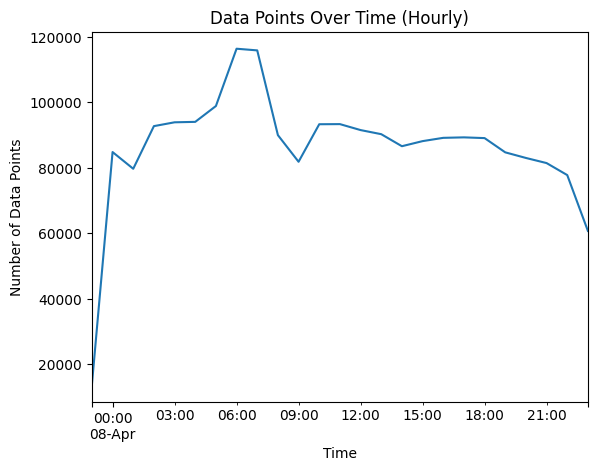

In [175]:
#时间序列建模
# 确保Timestamp列是datetime64类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 将Timestamp列设置为索引
df.set_index('Timestamp', inplace=True)

# 现在可以使用resample()进行时间序列分析
# 例如，按小时聚合并计算每个小时的数据点数量
hourly_data = df.resample('H').size()

# 绘制时间序列数据
hourly_data.plot()
plt.title('Data Points Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Data Points')
plt.show()

In [180]:
# 定义时间段
morning_peak = hourly_data[hourly_data.index.hour >= 7].mean()
evening_peak = hourly_data[hourly_data.index.hour >= 17].mean()
night = hourly_data[hourly_data.index.hour >= 21].mean()

print(f"Morning Peak Average Users: {morning_peak}")
print(f"Evening Peak Average Users: {evening_peak}")
print(f"Night Average Users: {night}")

Morning Peak Average Users: 83329.55555555556
Evening Peak Average Users: 72474.5
Night Average Users: 58415.5


In [190]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [191]:
# 读取数据
df = pd.read_csv('cleaned_xinlin.csv', sep=',', parse_dates=['Timestamp'])

In [192]:
# 将Timestamp转换为datetime类型，如果已经是则跳过此步骤
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 提取小时作为新列
df['Hour'] = df['Timestamp'].dt.hour

In [193]:
# 按小时分组并计算每个小时的用户数量
hourly_users = df.groupby('Hour').size()

In [196]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 假设您的数据保存在CSV文件中，我们首先需要读取这些数据
# 请替换为您的文件路径
df = pd.read_csv('cleaned_xinlin.csv')

# 将Timestamp转换为datetime类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 从Timestamp中提取小时和日期
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date

# 按小时和日期分组，并计算每个小时的用户数量
hourly_users = df.groupby(['Date', 'Hour']).size().reset_index()

# 将分组后的数据转换为时间序列格式
# 这里我们假设每小时的用户数量是连续的，如果数据中有缺失小时，需要进行处理
hourly_users = hourly_users.pivot(index='Hour', columns='Date', values=0)

# 假设我们使用过去24小时的数据来预测下一个小时的用户数量
# 我们需要选择一个日期作为我们的训练数据
train_date = hourly_users.index[-24]  # 假设我们使用最后一个日期的数据作为训练数据

# 训练数据
train_data = hourly_users.loc[:train_date]

# 测试数据（这里我们模拟测试数据，实际上您应该使用实际的数据）
# 假设测试数据是接下来的一个小时的用户数量
test_data = hourly_users.loc[train_date + timedelta(hours=1)]

# 将训练数据和测试数据转换为SARIMAX模型所需的形式
train_series = pd.Series(train_data.values.flatten(), index=train_data.index)
test_series = pd.Series(test_data.values.flatten(), index=test_data.index)

# 拟合SARIMAX模型，这里使用SARIMAX因为它支持季节性
# 参数p, d, q, P, D, Q, s需要根据数据进行调整
model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit()

# 打印模型的摘要
print(model_fit.summary())

# 使用模型进行预测
forecast = model_fit.get_forecast(steps=1)
forecast_series = pd.Series(forecast.predicted_mean, index=test_series.index)

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(test_series, forecast_series))
print('Test RMSE: %.3f' % rmse)

TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

In [197]:
# 假设我们使用最后一个日期的数据作为训练数据
train_date_index = hourly_users.index[-24]  # 获取最后一个日期的整数索引

# 将整数索引转换为实际的日期时间
train_date_datetime = hourly_users.index[train_date_index]

# 计算下一个日期时间
next_date_datetime = train_date_datetime + pd.Timedelta(hours=24)

# 将下一个日期时间转换回索引
next_date_index = hourly_users.index.get_loc(next_date_datetime)

# 训练数据
train_data = hourly_users.iloc[train_date_index]

# 测试数据
test_data = hourly_users.iloc[next_date_index]

TypeError: unsupported operand type(s) for +: 'numpy.int32' and 'Timedelta'

In [199]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 假设您的数据保存在CSV文件中，我们首先需要读取这些数据
# 请替换为您的文件路径
df = pd.read_csv('cleaned_xinlin.csv')

# 将Timestamp转换为datetime类型，并设置为索引
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# 从IMSI列创建一个唯一的用户标识符
df['UserIdentifier'] = df['IMSI']

# 按小时和用户标识符分组，并计算每个小时的独立用户数量
hourly_users = df.groupby([pd.Grouper(freq='H'), 'UserIdentifier']).size().reset_index()

# 将数据转换为时间序列格式，这里我们只关心每小时的用户数量
hourly_users_count = df.groupby(pd.Grouper(freq='H')).size()

# 从时间序列中提取用于训练模型的序列
# 我们使用最后24小时的数据作为训练集
train_series = hourly_users_count[-24:]

# 定义SARIMAX模型，这里使用SARIMAX因为它支持季节性
# 参数p, d, q, P, D, Q, s需要根据数据进行调整
# 这里的参数只是示例，需要根据模型的AIC或BIC值来选择最佳参数
model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit()

# 使用模型进行预测
forecast = model_fit.get_forecast(steps=1)
forecast_series = forecast.predicted_mean[0]

# 假设我们已经有了测试数据集的实际值
# 这里我们模拟一个测试数据点作为示例
actual_value = hourly_users_count.iloc[-1]  # 假设这是实际值

# 计算均方根误差
rmse = np.sqrt(mean_squared_error([actual_value], [forecast_series]))
print(f'Test RMSE: {rmse:.3f}')


"""
NORM_OF_PROJECTED_GRADIENT_<=_PGTOL”表明模型在优化过程中达到了梯度的容忍度，这是一个正常的收敛消息。
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Test RMSE: 42409.521


/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.
